In [8]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle

df = pd.read_csv("../data/fulldata.csv")
df2 = pd.read_csv("../data/6_14_pull.csv")

df = pd.concat([df,df2])

In [9]:
#Create simple dataframe with only text and predictor
df = df[['Title', 'Political Lean']] 

#dummy code predictor
df['Political Lean'] = df['Political Lean'].replace('Liberal',1)
df['Political Lean'] = df['Political Lean'].replace('Conservative',0)

df = df.rename({'Political Lean':'y'},axis=1) #replace column name for simplicity

df['Length'] = df['Title'].apply(lambda x: len(x))
df = df[df['Length']>=15]

#Split into X & y
X = df.drop(['y'],axis=1)
y = df['y']

#oversample minority class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=13)
X, y = oversample.fit_resample(X, y)

#shuffle dataset

X, y = shuffle(X,y, random_state=13)

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

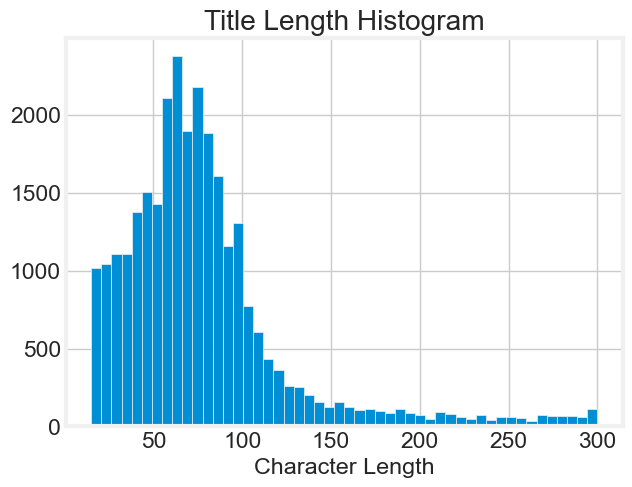

In [26]:
plt.figure(facecolor='white')
ax= plt.axes()
ax.set_facecolor('xkcd:white')
plt.hist(X['Length'], bins = 50)
plt.xlabel('Character Length')
plt.title('Title Length Histogram')
plt.show()

In [4]:
X = X.drop('Length',axis=1)

In [27]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def sentiment_analysis(sentence):
    sentiment_scores = sia.polarity_scores(sentence)
    compound_score = sentiment_scores["compound"]
    return compound_score
        

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Andrew\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
X['Sentiment'] = X['Title'].apply(sentiment_analysis)

In [29]:
X

,Title,Length,Sentiment
14453,You’re Either Pro-Israel or Pro-Palestine. You...,122,0.4588
27381,Didn't realize we needed a poll for this info.,46,0.0000
683,Is Christian Social Democracy a thing?,38,0.0000
20293,Southern Poverty Law Center Adds Moms For Libe...,67,0.0258
12451,EXCLUSIVE: UPS dismisses 250 Queens drivers af...,126,0.1860
...,...,...,...
27366,The GOP Isn’t Taking the 2024 Senate Primaries...,57,-0.5267
24080,Texas Rangers Refuse to Celebrate ‘Pride Month...,65,0.3612
74,"Desperate Afghans sell kidneys amid poverty, s...",55,-0.6808
14512,Bro got owned by a german in JOKES! source: th...,63,0.1840


In [30]:
#dropping duplicates due to oversampling
pd.set_option('display.max_colwidth', None)
X.sort_values('Sentiment').drop_duplicates(subset='Title').tail(20)

,Title,Length,Sentiment
5011,Income inequality and unemployment booming/ striketober: now is the time for collective action but democrats are so unorganized. The timing is perfect for big changes. Let organize and work on getting people better wages right now. Medicare for all right now. Clean water. Green new deal.,288,0.9100
1907,Johnson’s ‘Brexit freedoms bill’ won’t set us free. But it will reward his supporters,85,0.9127
9261,"Help me out here. I’m a Russian Libertarian. The Republic of Donbass, which has been shelled by Ukraine, has declared independence and has asked Russia for help. It doesn’t violate the NAP to help Donbass. It’s in support of another nation’s right to freedom and self-determination. Agree/disagree?",298,0.9136
23746,"17 After Jesus said this, he looked toward heaven and prayed: “Father, the hour has come. Glorify your Son, that your Son may glorify you. 2 For you granted him authority over all people that he might give eternal life to all those you have given him.",251,0.9186
3312,How would a heavy tax on billionaires be implemented if the richest billionaires make the majority of their wealth off of appreciation in value on their stocks and assets?,171,0.9186
3273,"Tammy Baldwin is the future of our party. She's a true progressive voice who can win in the Midwest. I appreciate that she is committed to universal healthcare, more democrats should follow her lead.",199,0.9201
11540,"""Fighting for free enterprise means standing up for free markets. The freedom to succeed includes the freedom to fail. We must defend entrepreneurial capitalism against the onslaught of the American Left."" Mike Pence",216,0.9217
3177,"""Kazakhstan commitment to privatisation remains strong. The ultimate goal of the programme is to increase the efficiency of Kazakhstan’s economy by transferring state assets to private investors, supporting their development and enhancing performance and returns""",263,0.9231
11657,"Dec 1, 2021- Pentagon IP office lacks support, expertise: GAO💲💻⚙️™-💲 The Pentagon needs to bulk up a unique office focused on intellectual property if it hopes to effectively manage the issues — and money — involved... new report... https://www.gao.gov/products/gao-22-104752",275,0.9231
11426,"""Why did the European labor supply decrease by a third from the early 1970s to the mid-1990s? Because the marginal effective tax rate was increased to 60% from 40%... You can't raise revenues by taxing people beyond their willingness to pay."" - E. Prescott, 2004 Nobel Prize Winner in Economics",294,0.9246


In [ ]:
df_full = pd.concat([X,y],axis=1)

In [ ]:
df_full[['y','Sentiment']].groupby('y').mean()

In [ ]:
df_full